# 婴儿名字分析

In [1]:
import pandas as pd
import numpy as np
names1880=pd.read_table('pydata-book-2nd-edition/datasets/babynames/yob1880.txt',sep=',',header=None,names=['name','sex','births'])

In [2]:
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']
for year in years:
    path='pydata-book-2nd-edition/datasets/babynames/yob%d.txt' %year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)    #pieces是list
names=pd.concat(pieces,ignore_index=True)

In [3]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [14]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [16]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


<IPython.core.display.Javascript object>


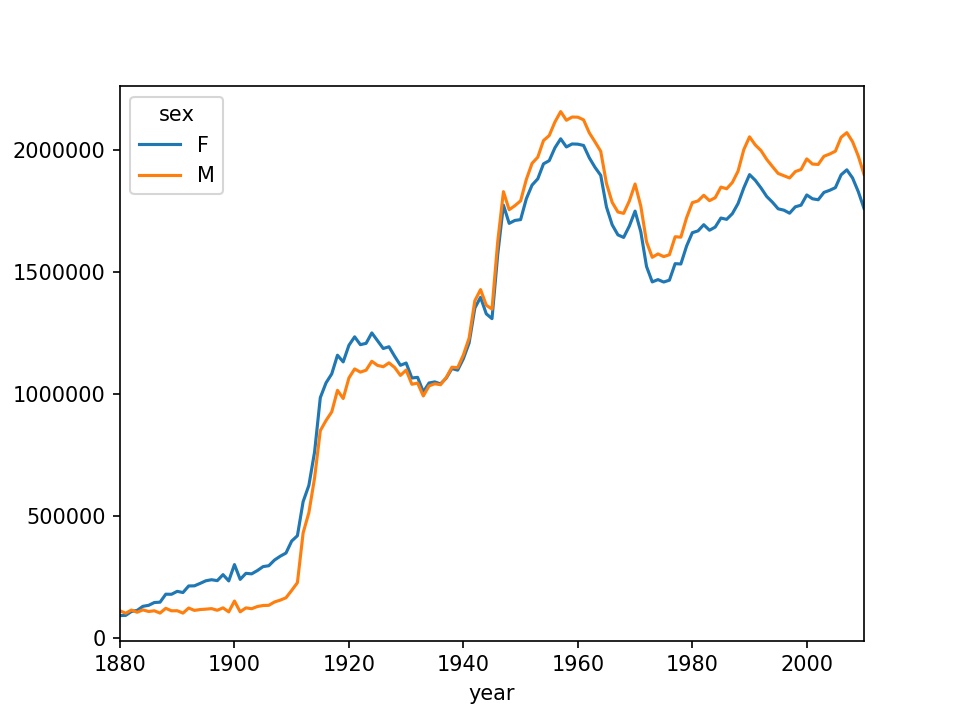

In [19]:
%matplotlib notebook
import matplotlib as mat
total_births.plot()

In [25]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop)

In [26]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [27]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [53]:
def get_top1000(group):
    return group.sort_values(by='prop',ascending=False)[:1000]
grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)

In [51]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [55]:
boys=top1000[top1000['sex']=='M']
girls=top1000[top1000.sex=='F']

In [61]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [67]:
total_births.fillna(0).head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,71.0,...,8.0,23.0,0.0,0.0,7.0,0.0,8.0,28.0,27.0,0.0
1881,0.0,0.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,81.0,...,0.0,22.0,0.0,0.0,10.0,0.0,9.0,21.0,27.0,0.0
1882,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,80.0,...,8.0,25.0,0.0,0.0,9.0,0.0,17.0,32.0,21.0,0.0
1883,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,79.0,...,0.0,23.0,0.0,0.0,10.0,0.0,11.0,35.0,25.0,0.0
1884,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,98.0,...,13.0,31.0,0.0,0.0,14.0,6.0,8.0,58.0,27.0,0.0


<IPython.core.display.Javascript object>


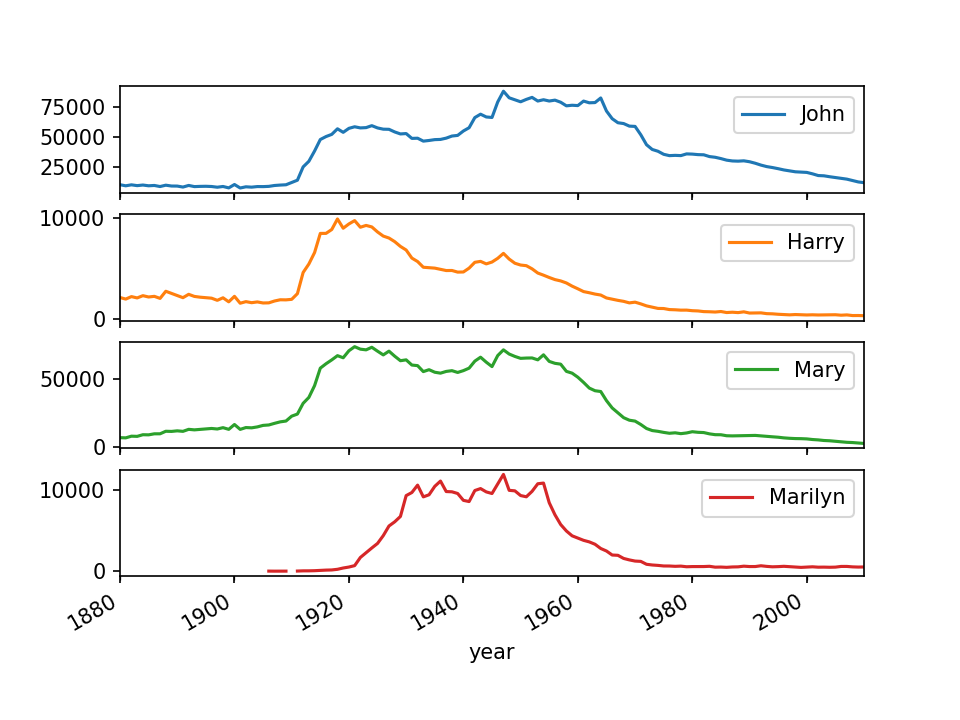

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000003F4DBFD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000004CB97E80>], dtype=object)

In [65]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True)   #不写subplots的话就画在了一张图上

In [101]:
table=top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

<IPython.core.display.Javascript object>


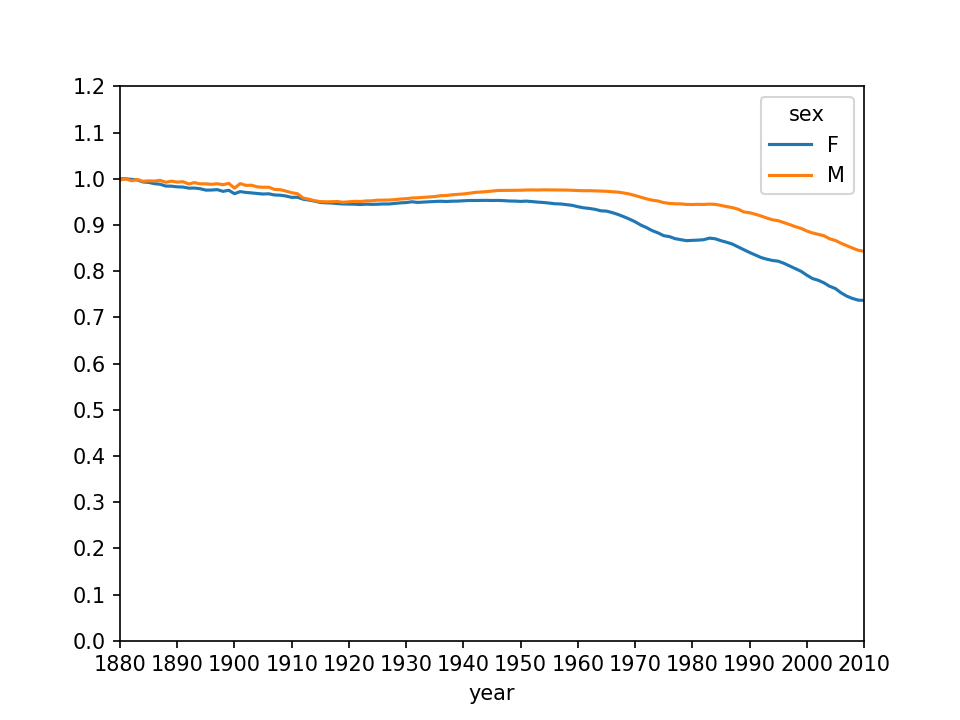

In [102]:
table.plot(yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [72]:
df=boys[boys.year==2010]

In [73]:
prop_cumsum=df.prop.cumsum()

In [74]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [75]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [92]:
years=range(1880,2011)
a=np.arange(0,131)
b=np.arange(0,131)
for year in years:
    df=boys[boys.year==year]
    a[year-1880]=df.prop.cumsum().searchsorted(0.5)
    df=girls[girls.year==year]
    b[year-1880]=df.prop.cumsum().searchsorted(0.5)


In [122]:
a

array([ 13,  13,  14,  14,  15,  15,  15,  16,  16,  17,  18,  19,  19,
        20,  21,  21,  22,  22,  23,  24,  24,  24,  25,  26,  27,  27,
        27,  29,  29,  29,  30,  30,  31,  32,  32,  32,  32,  31,  31,
        31,  30,  29,  29,  28,  28,  27,  27,  27,  27,  27,  27,  27,
        27,  27,  27,  27,  26,  26,  25,  25,  24,  23,  23,  22,  22,
        22,  21,  22,  22,  22,  22,  22,  22,  22,  23,  24,  25,  26,
        27,  29,  29,  29,  28,  28,  28,  27,  27,  27,  27,  28,  29,
        31,  32,  33,  33,  35,  35,  34,  34,  34,  34,  34,  34,  33,
        34,  35,  36,  38,  39,  42,  44,  47,  50,  53,  56,  59,  63,
        66,  69,  72,  76,  80,  82,  86,  91,  95,  98, 102, 108, 113, 116])

<IPython.core.display.Javascript object>


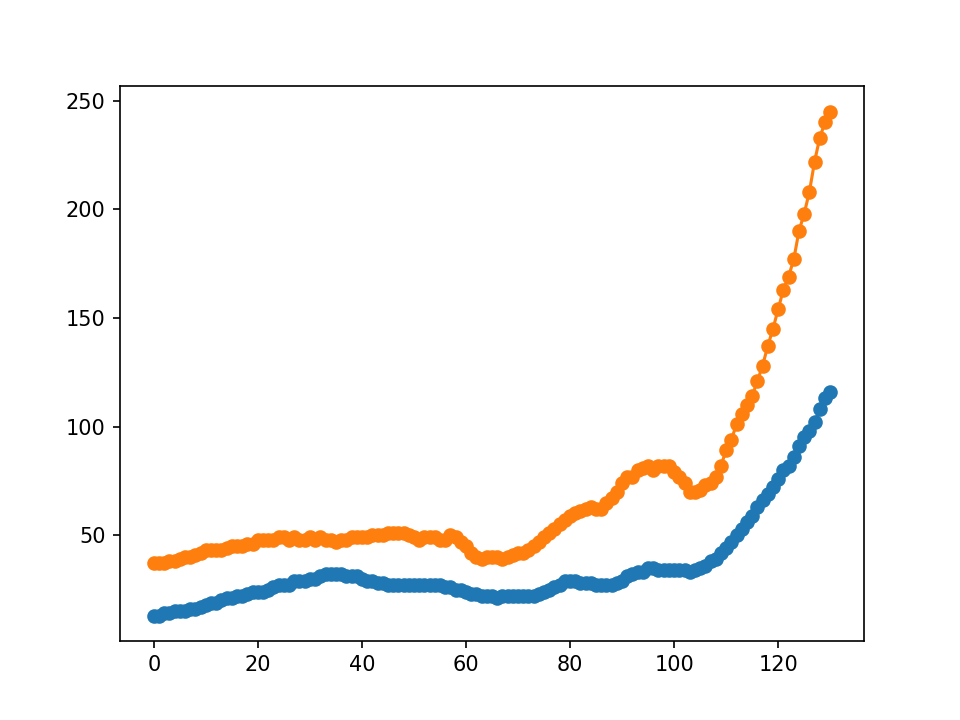

In [100]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(a,'-o',b,'-o')

In [118]:
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)+1
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)  #还是必须要加上groupby

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


In [119]:
diversity.head()

year  sex
1880  F      [38]
      M      [14]
1881  F      [38]
      M      [14]
1882  F      [38]
dtype: object

In [120]:
diversity=diversity.unstack('sex')   #按照性别分出来了
diversity[:5]

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [123]:
#diversity.plot()      #不行 Empty 'DataFrame': no numeric data to plot  因为数据类型是array

In [126]:
get_last_letter=lambda x:x[-1]
last_letters=names.name.map(get_last_letter)
last_letters.name='last_letter'
table=names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)  #columns可以选择多个参数

In [131]:
subtable=table.reindex(columns=[1910,1960,2010],level='year')

In [133]:
letter_prop=subtable/subtable.sum().astype(float)    #subtable.sum()按照年份和性别汇总求和

<IPython.core.display.Javascript object>


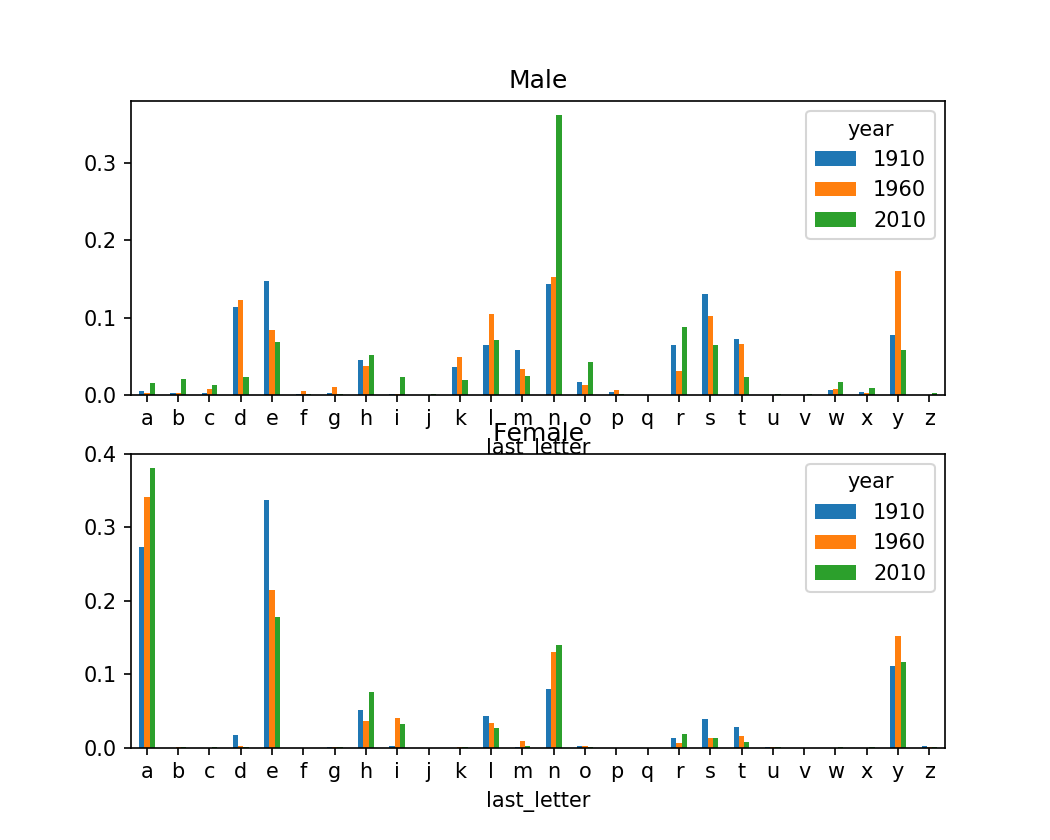

In [141]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female')

In [145]:
letter_prop=table/table.sum().astype(float)
dny_ts=letter_prop.loc[['d','n','y'],'M'].T    #loc中取了'M'，取[d,n,y]，然后转置. 经试验只能按这种形式取，即loc['d','M']，不能取年份，也不能loc['M']
#即在索引时行优先，其次为列的第一项
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<IPython.core.display.Javascript object>


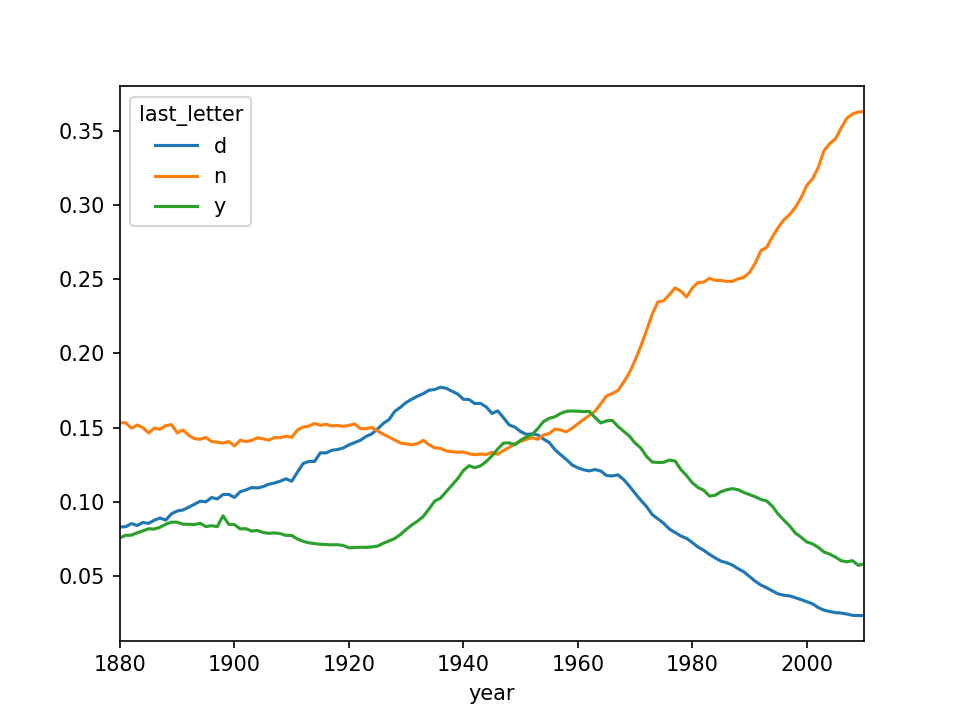

In [163]:
dny_ts.plot()

## 提取dataframe中部分行的重要手段

In [169]:
all_names=top1000.name.unique()  #确保名字是单一的,输出结果为array
mask=np.array(['lesl' in x.lower() for x in all_names])  #x.lower() x必须为一个变量，不能为series
lesley_like=all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [225]:
filtered=top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [256]:
#或者在将name设置为索引之后也可以用array或list访问指定的行
filtered1=filtered.set_index('name')
filtered1.loc[lesley_like].head()

,sex,births,year,prop
name,,,,
Leslie,F,8,1880,0.000088
Leslie,M,79,1880,0.000715
Leslie,F,11,1881,0.000120
Leslie,M,92,1881,0.000913
Leslie,F,9,1882,0.000083


In [236]:
filtered.head()

name sex  births  year      prop
year sex                                         
1880 F   654   Leslie   F       8  1880  0.000088
     M   1108  Leslie   M      79  1880  0.000715
1881 F   2523  Leslie   F      11  1881  0.000120
     M   3072  Leslie   M      92  1881  0.000913
1882 F   4593  Leslie   F       9  1882  0.000083

In [224]:
table=filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)
table=table.div(table.sum(1),axis=0)  #横向汇总相加
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


<IPython.core.display.Javascript object>


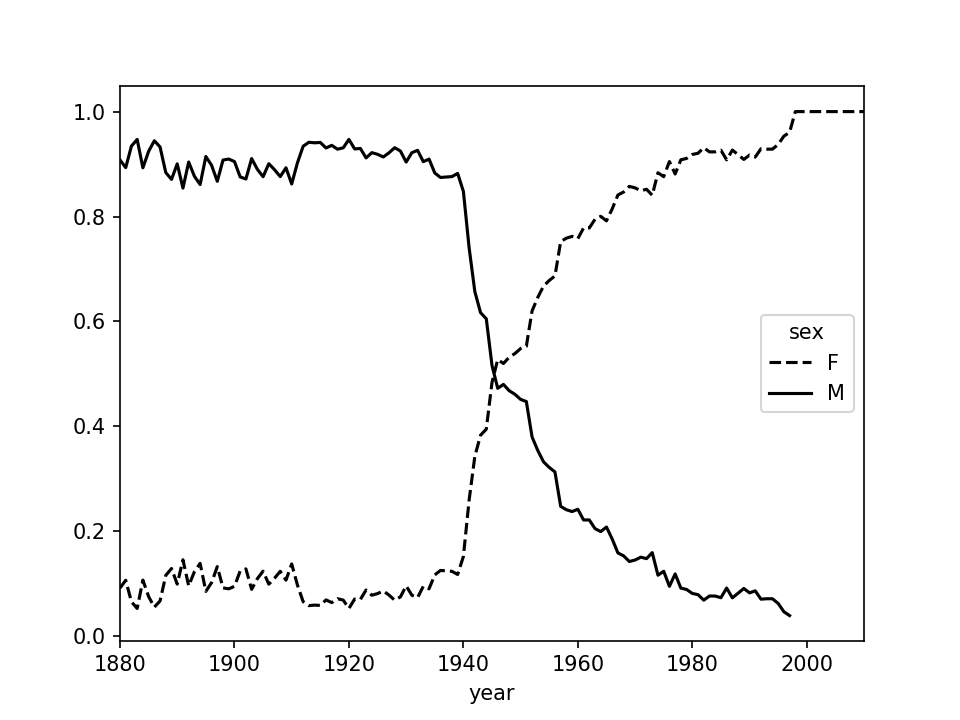

In [260]:
table.plot(style={'M':'k-','F':'k--'})

## 节外生枝小试验

<IPython.core.display.Javascript object>


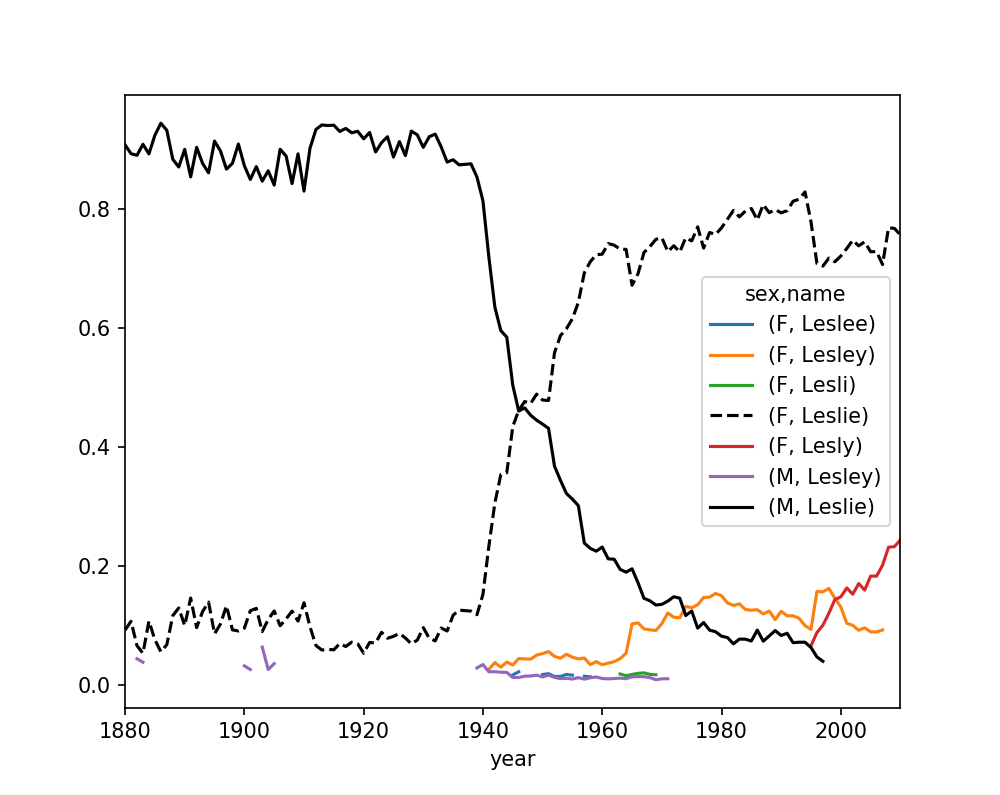

In [268]:
table2=filtered.pivot_table('births',index='year',columns=['sex','name'],aggfunc=sum)   #说明作图的行标是year，各列为columns所对应的
table2=table2.div(table2.sum(1),axis=0)
#table2.plot(style={('M','Leslie'):'k-',('F','Leslie'):'k--',('M','Lesley'):'o-',('F','Lesley'):'o--'})
table2.plot(style={('M','Leslie'):'k-',('F','Leslie'):'k--'})

In [261]:
filtered1=filtered.set_index('name')
filtered2=filtered1.loc[['Lesley','Leslie']]
table1=filtered2.pivot_table('births',index='year',columns=['sex','name'],aggfunc=sum)
table1.head()

sex       F             M       
name Lesley Leslie Lesley Leslie
year                            
1880    NaN    8.0    NaN   79.0
1881    NaN   11.0    NaN   92.0
1882    NaN    9.0    6.0  122.0
1883    NaN    7.0    5.0  120.0
1884    NaN   15.0    NaN  125.0

<IPython.core.display.Javascript object>


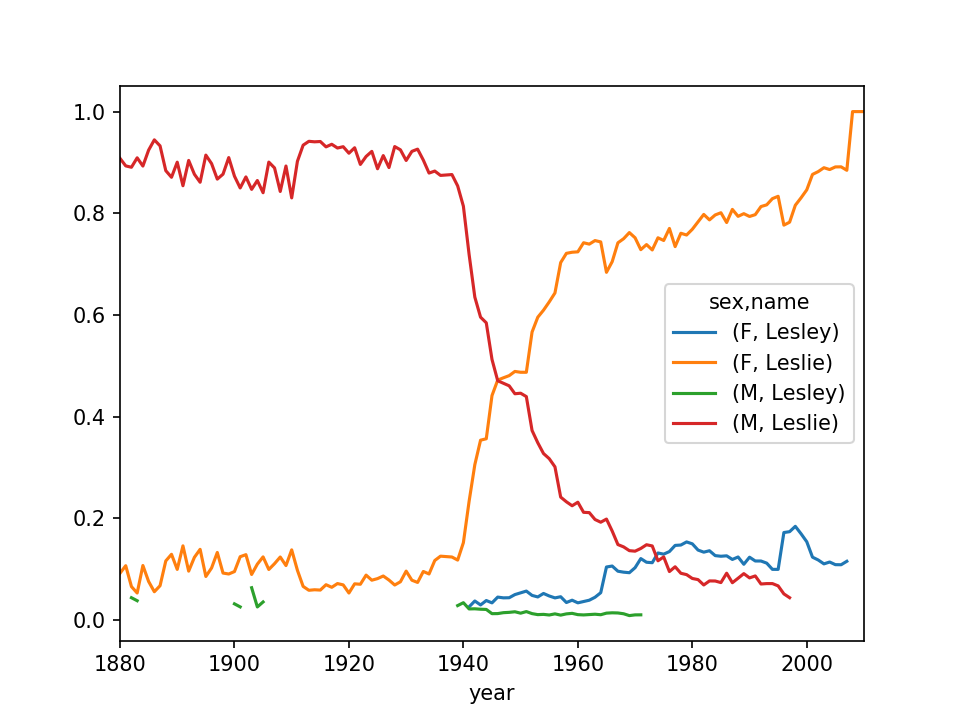

In [263]:
table1=table1.div(table1.sum(1),axis=0)
table1.plot()

# 部分探索

In [8]:
s=pd.DataFrame([{'name':'a','num':10},
            {'name':'ab','num':20},
            {'name':'a','num':5},
            {'name':'bd','num':7},
            {'name':'A','num':18}])
s

,name,num
0,a,10
1,ab,20
2,a,5
3,bd,7
4,A,18


In [1]:
import pandas as pd
s=pd.DataFrame({'name':['a','ab','a','bd','A'],
                'num':[10,20,5,7,18]
               })
s

,name,num
0,a,10
1,ab,20
2,a,5
3,bd,7
4,A,18


In [5]:
s.index.name='id'
s

,name,num
id,,
0,a,10
1,ab,20
2,a,5
3,bd,7
4,A,18


In [12]:
s.index[:2]
#s.index[2]    #输出为2

RangeIndex(start=0, stop=2, step=1, name=u'id')

In [3]:
s.loc[s.index[:2]]
#或者
#s[:2]

,name,num
0,a,10
1,ab,20


In [4]:
data={'state':['o','o','o','n','n'],
     'year':[2000,2001,2002,2001,2002],
     'pop' :[1.5,1.7,1.6,2.4,2.9]}
frame=pd.DataFrame(data,columns=['year','state','pop','debt'],index=['one','two','three','four','five'])
frame

,year,state,pop,debt
one,2000,o,1.5,NaN
two,2001,o,1.7,NaN
three,2002,o,1.6,NaN
four,2001,n,2.4,NaN
five,2002,n,2.9,NaN


In [6]:
frame.loc['one',['year','pop']]

year    2000
pop      1.5
Name: one, dtype: object

In [28]:
frame1=frame.copy()
frame1.index.name='id'
frame1.columns.name='categlory'
frame1

categlory,year,state,pop,debt
id,,,,
one,2000,o,1.5,NaN
two,2001,o,1.7,NaN
three,2002,o,1.6,NaN
four,2001,n,2.4,NaN
five,2002,n,2.9,NaN


In [29]:
frame1.values    #取出DataFrame的值

array([[2000L, 'o', 1.5, nan],
       [2001L, 'o', 1.7, nan],
       [2002L, 'o', 1.6, nan],
       [2001L, 'n', 2.4, nan],
       [2002L, 'n', 2.9, nan]], dtype=object)

In [36]:
frame1.values[:,1]

array(['o', 'o', 'o', 'n', 'n'], dtype=object)

In [183]:
u=pd.Series({'name':'a','num':10})
u

name     a
num     10
dtype: object

In [6]:
for i,v in enumerate(s.name):
    s.name[i]=v.lower()
s.name
#另一种做法
#for label, value in s.name.iteritems():
#    s.name.set_value(label, value.lower())   
#s    

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     a
1    ab
2     a
3    bd
4     a
Name: name, dtype: object

In [217]:
u=s.groupby('name').num.sum()  #这句是可以将同样的name进行合并的
u

name
a     33
ab    20
bd     7
Name: num, dtype: int64

In [9]:
all_name=s.name.unique()
#s[all_name]       #都是错的
#s.loc[all_name]   #都是错的
ups=s.set_index('name')
ups.loc[all_name]

,num
name,
a,10
a,5
ab,20
bd,7
A,18
